# T1 - Aproximación del Valor de Pi (Simulación de Montecarlo)

### IMPORTACIONES

In [26]:
import numpy as np
import matplotlib.pyplot as plt

### FUNCIONES

In [68]:
def simulacion_montecarlo(n_puntos: int):
    """
    Ejecuta una simulación de Montecarlo para aproximar el valor de Pi.

    """
    # Crea un array de n_puntos con coordenadas (x, y) en el rango [-1, 1].
    puntos = np.random.uniform(-1, 1, (n_puntos, 2))

    # Calcula la distancia al cuadrado desde el origen (0,0) para todos los puntos a la vez.
    distancia_al_cuadrado = puntos[:, 0]**2 + puntos[:, 1]**2

    # Crea una máscara booleana: True para puntos dentro del círculo (radio=1), False para los de fuera.
    puntos_estan_dentro = distancia_al_cuadrado <= 1

    # Usa la máscara para filtrar y separar los puntos en dos grupos.
    puntos_dentro = puntos[puntos_estan_dentro]
    puntos_fuera = puntos[~puntos_estan_dentro]

    # Cálculo de Pi
    # La probabilidad de que un punto caiga en el círculo es la proporción de áreas:
    # P = (Área Círculo) / (Área Cuadrado) = (π * r^2) / (2r * 2r) = π / 4
    # π ≈ 4 * (puntos dentro / puntos totales)
    pi_estimado = 4 * len(puntos_dentro) / n_puntos

    return pi_estimado, puntos_dentro, puntos_fuera

In [60]:
def graficar_simulacion(pi_estimado: float, puntos_dentro: np.ndarray, puntos_fuera: np.ndarray, n_puntos_totales: int):
    """
    Crea una visualización de la simulación de Montecarlo.
    """

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.scatter(puntos_fuera[:, 0], puntos_fuera[:, 1], color='#87CEEB', s=10, label='Fuera del Círculo')
    ax.scatter(puntos_dentro[:, 0], puntos_dentro[:, 1], color='#FF6347', s=10, label='Dentro del Círculo')

    circulo = plt.Circle((0, 0), 1, color='black', fill=False, linewidth=2, label='Límite (r=1)')
    ax.add_artist(circulo)

    ax.set_title(f"Aproximación de π con {n_puntos_totales:,} Puntos\nπ ≈ {pi_estimado:.6f}", fontsize=14)
    ax.set_xlabel("Eje X")
    ax.set_ylabel("Eje Y")
    ax.set_aspect('equal', adjustable='box')
    ax.set_xlim(-1, 1)
    ax.set_ylim(-1, 1)
    ax.legend()


### EJECUCIÓN DE LA SIMULACIÓN Y PLOTEO

Simulación con 9000 puntos.
Valor de π estimado: 3.14


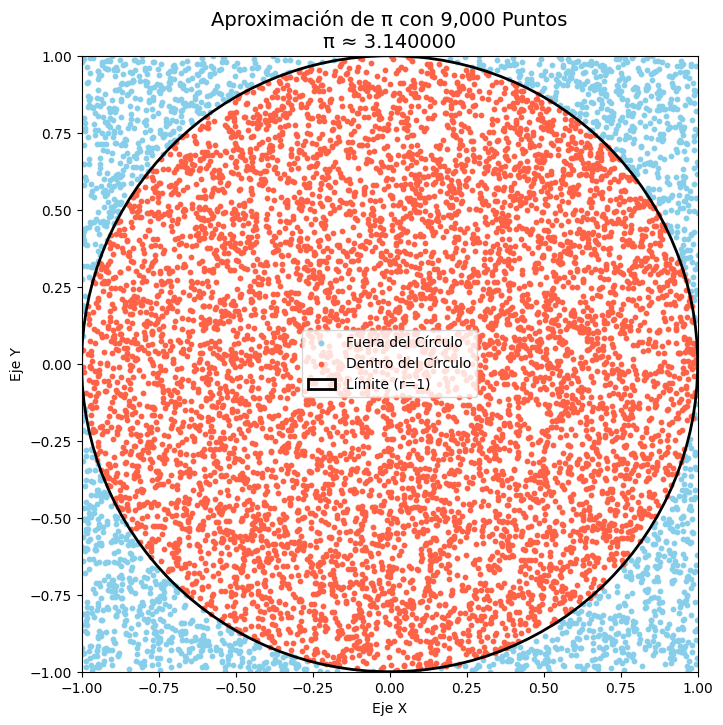

In [82]:
# Ejeución de la simulación con 9000 puntos
NUMERO_DE_PUNTOS = 9000

pi_calculado, coords_dentro, coords_fuera = simulacion_montecarlo(NUMERO_DE_PUNTOS)

print(f"Simulación con {NUMERO_DE_PUNTOS} puntos.")
print(f"Valor de π estimado: {pi_calculado}")

graficar_simulacion(pi_calculado, coords_dentro, coords_fuera, NUMERO_DE_PUNTOS)
plt.show()
